<a href="https://colab.research.google.com/github/Fanova-AR/D_S_3_COM_95480/blob/main/Art_of_War_Seoane_Facundo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalo las librerías que voy a utilizar

In [15]:
!pip install spacy nltk PyPDF2
!python -m spacy download es_core_news_sm
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

import requests
import PyPDF2
import io
import spacy
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk import pos_tag
import matplotlib.pyplot as plt
from collections import Counter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 100.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


# Descargar el PDF desde GitHub

In [16]:
url = "https://github.com/Fanova-AR/D_S_3_COM_95480/raw/main/El%20Arte%20de%20la%20Guerra%20Sun%20Tzu.pdf"
response = requests.get(url)
pdf_file = io.BytesIO(response.content)
pdf_reader = PyPDF2.PdfReader(pdf_file)
text = ""

for page in pdf_reader.pages:
    text += page.extract_text() + "\n"

print("✓ Texto extraído exitosamente")
print(f"Longitud del texto: {len(text)} caracteres")

✓ Texto extraído exitosamente
Longitud del texto: 91675 caracteres


# Preprocesamiento de texto

In [17]:
def preprocesamiento_base(texto):
    # Convertir a minúsculas y tokenizar
    tokens = word_tokenize(texto.lower())
    # Filtrar solo palabras alfabéticas
    tokens = [token for token in tokens if token.isalpha()]
    return tokens

##Procesamiento sin Stopwords

In [18]:
def procesamiento_completo_sin_stopwords(tokens):
    # Remover stopwords
    stop_words = set(stopwords.words('spanish'))
    tokens_sin_stopwords = [token for token in tokens if token not in stop_words]

    # Lematización
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(" ".join(tokens_sin_stopwords))
    lemas = [token.lemma_ for token in doc]

    return lemas

##Procesamiento con Stopword

In [19]:
def procesamiento_completo_con_stopwords(tokens):
    # Mantener stopwords
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(" ".join(tokens))
    lemas = [token.lemma_ for token in doc]

    return lemas

## Aplico Procesamiento

In [20]:
tokens_base = preprocesamiento_base(text)

procesado_sin_stopwords = procesamiento_completo_sin_stopwords(tokens_base)
procesado_con_stopwords = procesamiento_completo_con_stopwords(tokens_base)

print("✓ Procesamiento completado")
print(f"Tokens con stopwords: {len(procesado_con_stopwords)}")
print(f"Tokens sin stopwords: {len(procesado_sin_stopwords)}")

✓ Procesamiento completado
Tokens con stopwords: 15101
Tokens sin stopwords: 7798


##Análisis comparativo visual

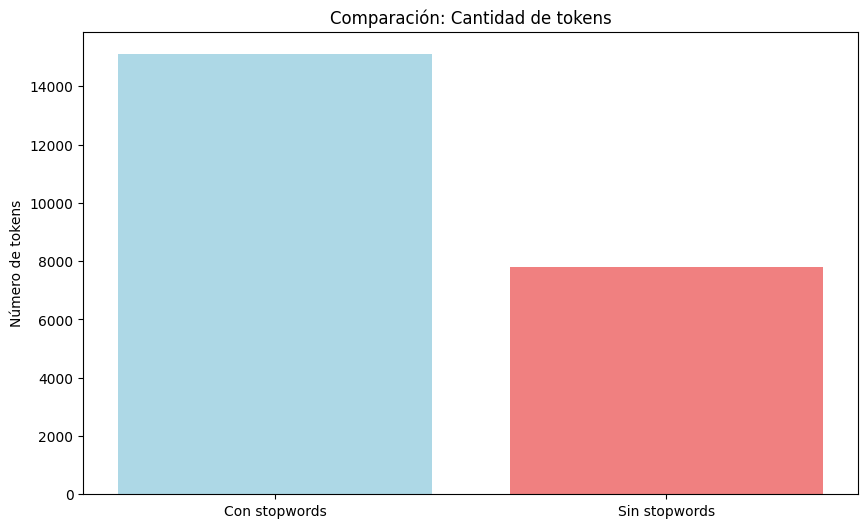

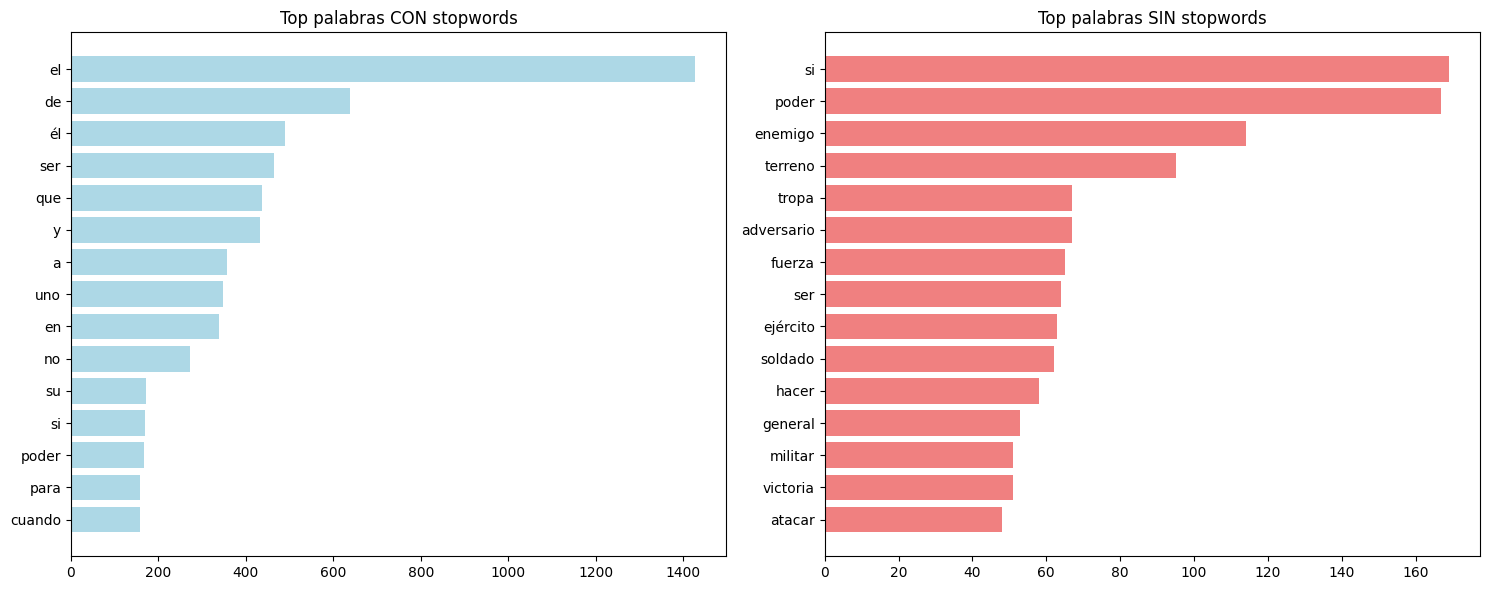

In [21]:
plt.figure(figsize=(10, 6))

comparacion_cantidad = {
    'Con stopwords': len(procesado_con_stopwords),
    'Sin stopwords': len(procesado_sin_stopwords)
}

plt.bar(comparacion_cantidad.keys(), comparacion_cantidad.values(), color=['lightblue', 'lightcoral'])
plt.title('Comparación: Cantidad de tokens')
plt.ylabel('Número de tokens')
plt.show()

# 2. PALABRAS MÁS FRECUENTES (COMPARATIVA)
def top_palabras(tokens, n=10):
    return Counter(tokens).most_common(n)

top_con_stopwords = top_palabras(procesado_con_stopwords, 15)
top_sin_stopwords = top_palabras(procesado_sin_stopwords, 15)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico con stopwords
palabras1, frecuencias1 = zip(*top_con_stopwords)
ax1.barh(palabras1, frecuencias1, color='lightblue')
ax1.set_title('Top palabras CON stopwords')
ax1.invert_yaxis()

# Gráfico sin stopwords
palabras2, frecuencias2 = zip(*top_sin_stopwords)
ax2.barh(palabras2, frecuencias2, color='lightcoral')
ax2.set_title('Top palabras SIN stopwords')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

## POS Tagging

In [22]:
def analisis_pos(tokens):
    # Tomar muestra para no saturar
    muestra = tokens[:100]
    tags = pos_tag(muestra)

    # Contar tipos de palabras
    conteo_pos = Counter(tag for word, tag in tags)

    return tags, conteo_pos

# Aplicar a ambos casos
tags_con, conteo_con = analisis_pos(procesado_con_stopwords)
tags_sin, conteo_sin = analisis_pos(procesado_sin_stopwords)

print("EJEMPLOS DE POS TAGGING:")
print("\nCon stopwords (primeras 10):")
for word, tag in tags_con[:10]:
    print(f"{word:15} -> {tag}")

print("\nSin stopwords (primeras 10):")
for word, tag in tags_sin[:10]:
    print(f"{word:15} -> {tag}")

EJEMPLOS DE POS TAGGING:

Con stopwords (primeras 10):
l               -> NN
sun             -> NN
tzu             -> NN
el              -> NN
arte            -> NN
de              -> IN
el              -> FW
guerra          -> FW
el              -> FW
arte            -> FW

Sin stopwords (primeras 10):
l               -> NN
sun             -> NN
tzu             -> NN
arte            -> NN
guerra          -> NN
arte            -> JJ
guerra          -> NN
mejor           -> NN
libro           -> NN
estrategia      -> NN


##Comparación diversidad léxica

In [23]:
def diversidad_lexica(tokens):
    return len(set(tokens)) / len(tokens)

div_con = diversidad_lexica(procesado_con_stopwords)
div_sin = diversidad_lexica(procesado_sin_stopwords)

print(f"\nDIVERSIDAD LÉXICA:")
print(f"Con stopwords: {div_con:.3f}")
print(f"Sin stopwords: {div_sin:.3f}")


DIVERSIDAD LÉXICA:
Con stopwords: 0.156
Sin stopwords: 0.306


## Stemming y Lematización

In [24]:
def comparar_stemming_lematizacion(tokens):
    stemmer = SnowballStemmer('spanish')

    # Stemming
    stems = [stemmer.stem(token) for token in tokens[:20]]

    # Lematización
    nlp = spacy.load("es_core_news_sm")
    doc = nlp(" ".join(tokens[:20]))
    lemas = [token.lemma_ for token in doc]

    return list(zip(tokens[:20], stems, lemas))

comparacion = comparar_stemming_lematizacion(tokens_base)

print("\nCOMPARACIÓN STEMMING vs LEMATIZACIÓN:")
print("Palabra original\tStem\t\tLema")
print("-" * 50)
for original, stem, lema in comparacion:
    print(f"{original:15}\t{stem:15}\t{lema:15}")


COMPARACIÓN STEMMING vs LEMATIZACIÓN:
Palabra original	Stem		Lema
--------------------------------------------------
l              	l              	l              
sun            	sun            	sun            
tzu            	tzu            	tzu            
el             	el             	el             
arte           	arte           	arte           
de             	de             	de             
la             	la             	el             
guerra         	guerr          	guerra         
el             	el             	el             
arte           	arte           	arte           
de             	de             	de             
la             	la             	el             
guerra         	guerr          	guerra         
es             	es             	ser            
el             	el             	el             
mejor          	mejor          	mejor          
libro          	libr           	libro          
de             	de             	de             
estrategia     	es

# CONCLUSIONES VISUALES FINALES

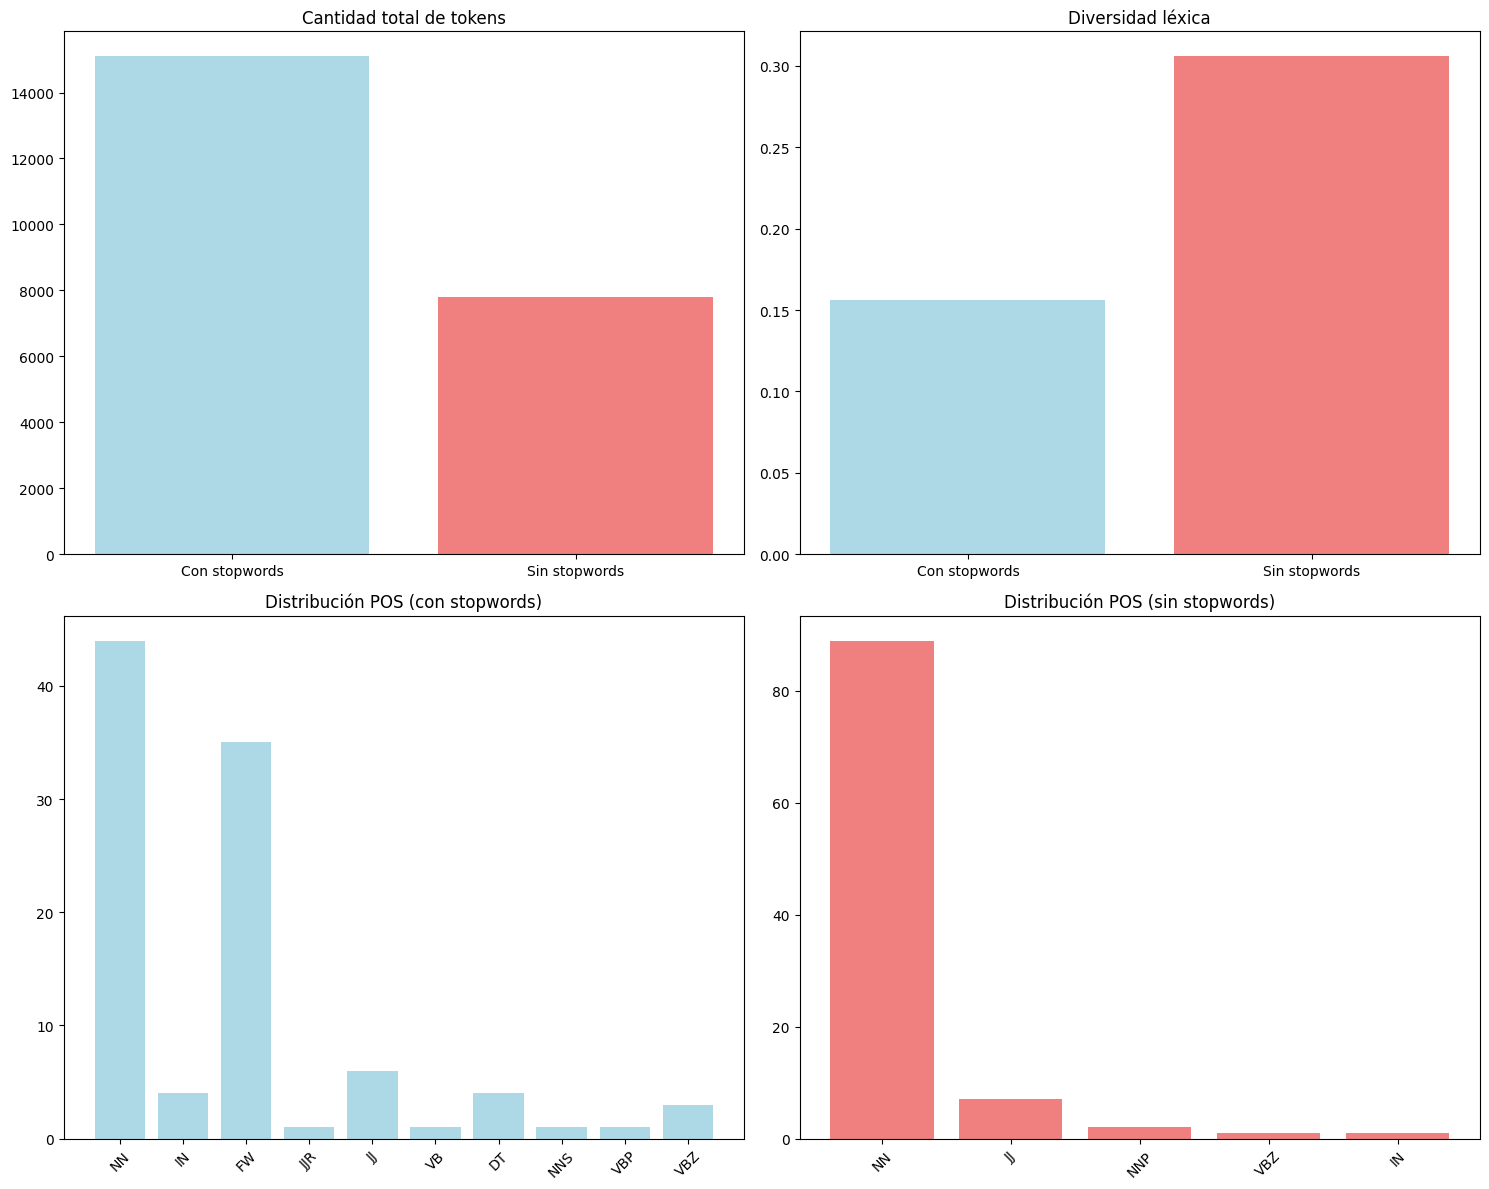

RESUMEN COMPARATIVO DEL PREPROCESAMIENTO
Reducción de tokens al remover stopwords: 48.4%
Aumento en diversidad léxica: 95.7%
Stopwords removidos: 7303 palabras

TOP 5 PALABRAS MÁS FRECUENTES:
Con stopwords: ['el', 'de', 'él', 'ser', 'que']
Sin stopwords: ['si', 'poder', 'enemigo', 'terreno', 'tropa']


In [25]:
# GRÁFICO COMPARATIVO FINAL
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. Cantidad de tokens
ax1.bar(['Con stopwords', 'Sin stopwords'],
        [len(procesado_con_stopwords), len(procesado_sin_stopwords)],
        color=['lightblue', 'lightcoral'])
ax1.set_title('Cantidad total de tokens')

# 2. Diversidad léxica
ax2.bar(['Con stopwords', 'Sin stopwords'],
        [div_con, div_sin],
        color=['lightblue', 'lightcoral'])
ax2.set_title('Diversidad léxica')

# 3. Tipos de palabras (POS) con stopwords
tags = list(conteo_con.keys())
counts = list(conteo_con.values())
ax3.bar(tags, counts, color='lightblue')
ax3.set_title('Distribución POS (con stopwords)')
ax3.tick_params(axis='x', rotation=45)

# 4. Tipos de palabras (POS) sin stopwords
tags = list(conteo_sin.keys())
counts = list(conteo_sin.values())
ax4.bar(tags, counts, color='lightcoral')
ax4.set_title('Distribución POS (sin stopwords)')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# RESUMEN ESTADÍSTICO
print("=" * 60)
print("RESUMEN COMPARATIVO DEL PREPROCESAMIENTO")
print("=" * 60)
print(f"Reducción de tokens al remover stopwords: {(len(procesado_con_stopwords) - len(procesado_sin_stopwords)) / len(procesado_con_stopwords) * 100:.1f}%")
print(f"Aumento en diversidad léxica: {(div_sin - div_con) / div_con * 100:.1f}%")
print(f"Stopwords removidos: {len(tokens_base) - len(procesado_sin_stopwords)} palabras")
print("\nTOP 5 PALABRAS MÁS FRECUENTES:")
print("Con stopwords:", [word for word, freq in top_con_stopwords[:5]])
print("Sin stopwords:", [word for word, freq in top_sin_stopwords[:5]])